In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import holidays
daily=pd.read_csv("day.csv")
hourly=pd.read_csv("hour.csv")
daily=daily.rename(columns={"dteday":"date","yr":"year","atemp":"ftemp","mnth":"month","weathersit":"weather"})
hourly=hourly.rename(columns={"dteday":"date","yr":"year","atemp":"ftemp","mnth":"month","hr":"hour","weathersit":"weather"})
daily["date"]=pd.to_datetime(daily["date"])
hourly["date"]=pd.to_datetime(hourly["date"])
#No missing values
#We saw that the seasons column was totally scrambled, so we can not trust the other date columns to be correct
#We will extract the specifics from the original date again
daily["year"]=pd.DatetimeIndex(daily["date"]).year
daily["month"]=pd.DatetimeIndex(daily["date"]).month
daily["day"]=pd.DatetimeIndex(daily["date"]).day
daily["weekday"]=pd.DatetimeIndex(daily["date"]).weekday
hourly["year"]=pd.DatetimeIndex(hourly["date"]).year
hourly["month"]=pd.DatetimeIndex(hourly["date"]).month
hourly["day"]=pd.DatetimeIndex(hourly["date"]).day
hourly["weekday"]=pd.DatetimeIndex(hourly["date"]).weekday
#Do some renaming and categorization for some columns
daily=daily[["instant","date","year","month","day","season","weekday","workingday","weather","temp","ftemp","hum","windspeed","casual","registered","cnt"]]
hourly=hourly[["instant","date","year","month","day","hour","season","weekday","workingday","weather","temp","ftemp","hum","windspeed","casual","registered","cnt"]]
daily["weather"]=daily["weather"].replace({1:"Good",2:"Cloudy",3:"Rain",4:"Thunder"}).astype("category")
hourly["weather"]=hourly["weather"].replace({1:"Good",2:"Cloudy",3:"Rain",4:"Thunder"}).astype("category")
daily["weekday"]=daily["weekday"].replace({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}).astype("category")
hourly["weekday"]=hourly["weekday"].replace({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}).astype("category")

In [8]:
#Assign seasons based on the normal division of the year
for i in range(len(daily)):
    if daily.loc[i,"month"]<3 or daily.loc[i,"month"]==12: daily.loc[i,"season"]="Winter"
    elif daily.loc[i,"month"]<6: daily.loc[i,"season"]="Spring"
    elif daily.loc[i,"month"]<9: daily.loc[i,"season"]="Summer"
    else: daily.loc[i,"season"]="Autumn"
for i in range(len(hourly)):
    if hourly.loc[i,"month"]<3 or hourly.loc[i,"month"]==12: hourly.loc[i,"season"]="Winter"
    elif hourly.loc[i,"month"]<6: hourly.loc[i,"season"]="Spring"
    elif hourly.loc[i,"month"]<9: hourly.loc[i,"season"]="Summer"
    else: hourly.loc[i,"season"]="Autumn"


In [9]:
#Check working days
for i in range(len(daily)):
    if daily.loc[i,"day"]!="Sat" and daily.loc[i,"day"]!="Sun": daily.loc[i,"workingday"]=1
    else: daily.loc[i,"workingday"]=0
for i in range(len(hourly)):
    if hourly.loc[i,"day"]!="Sat" and hourly.loc[i,"day"]!="Sun": hourly.loc[i,"workingday"]=1
    else: hourly.loc[i,"workingday"]=0

In [10]:
#Check the holidays
dc_holidays=holidays.country_holidays("US",subdiv="DC")
for i in range(len(daily)):
    if daily.loc[i,"date"] in dc_holidays:
        daily.loc[i,"holiday"]=1
        daily.loc[i,"workingday"]=0
    else: daily.loc[i,"holiday"]=0
for i in range(len(hourly)):
    if hourly.loc[i,"date"] in dc_holidays:
        hourly.loc[i,"holiday"]=1
        hourly.loc[i,"workingday"]=0
    else: hourly.loc[i,"holiday"]=0

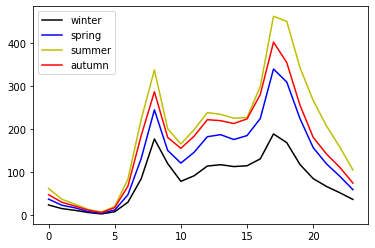

In [21]:
tempw=hourly.loc[(hourly["season"]=="Winter")&(hourly["year"]==2011)]
tempspr=hourly.loc[(hourly["season"]=="Spring")&(hourly["year"]==2011)]
tempsum=hourly.loc[(hourly["season"]=="Summer")&(hourly["year"]==2011)]
tempa=hourly.loc[(hourly["season"]=="Autumn")&(hourly["year"]==2011)]
tempw=tempw.groupby("hour").mean()
tempspr=tempspr.groupby("hour").mean()
tempsum=tempsum.groupby("hour").mean()
tempa=tempa.groupby("hour").mean()
plt.plot(tempw.index,tempw["cnt"],"k",label="winter")
plt.plot(tempspr.index,tempspr["cnt"],"b",label="spring")
plt.plot(tempsum.index,tempsum["cnt"],"y",label="summer")
plt.plot(tempa.index,tempa["cnt"],"r",label="autumn")
plt.legend()

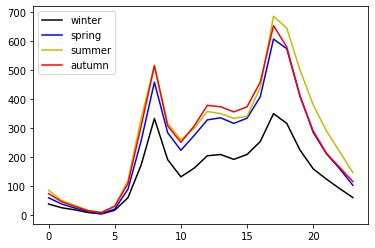

In [22]:
#Check when most regitered and non registered users are active
#Check important event in DC for that timeframe